**In this project, we aim to evaluate the model using the feature selection technique. Our project is a regression-based machine learning project as our following data do not have any discrete or class value but have continuous data like sales. Regression is a Supervized Machine learning technique that is best used for quantity or continuous data.**

In [ ]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 13.9MB/s]


# Importing the necceassary libraries

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/ads.csv")

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# df.head() helps to view dataset
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# checking type of columns
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

# cleaning data

In [ ]:
#  checking how many rows and column are there in given dataset
df.shape

(200, 4)

There are 4 columns and 200 rows

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(200, 4)

In [ ]:
# statistical measure of the given dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Therefore , statistical measure gives mean value , standard deviation ,median , minimun value , maximum value of the given dataset ,for eg :

* the mean value of TV is 147.04

* the max value of TV is 296.40

* the standard deviation value of TV is 85.85

Similary it also gives the percentage value of data , for eg :

* 25% value of TV is less than 74.37

* 50% value of TV is less than 149.75

* 75% value of TV is less than 218.40

In [ ]:
# .info() gives information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
# checking the missing values
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Axes: >

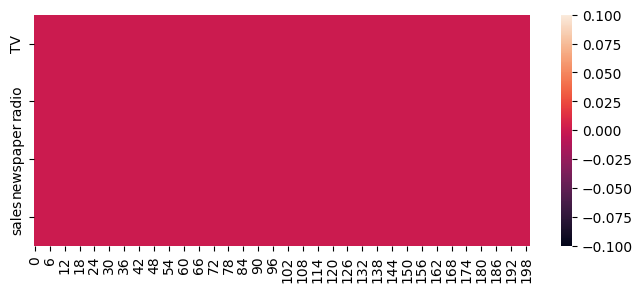

In [ ]:
# visualization
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
sns.heatmap(df.isna().transpose())

It looks like the given data doenot have any missing values

<Axes: xlabel='TV', ylabel='sales'>

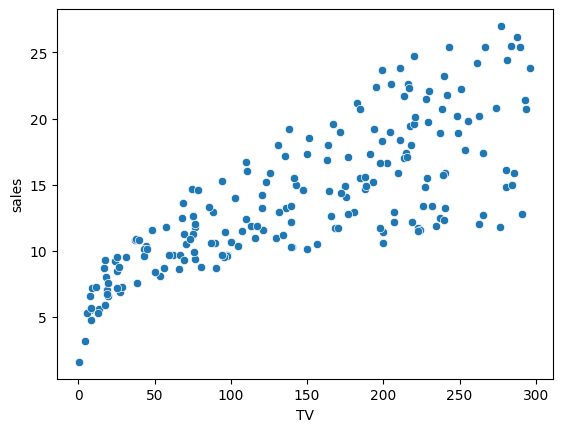

In [ ]:
sns.scatterplot(x='TV', y='sales', data=df)

<Axes: xlabel='radio', ylabel='sales'>

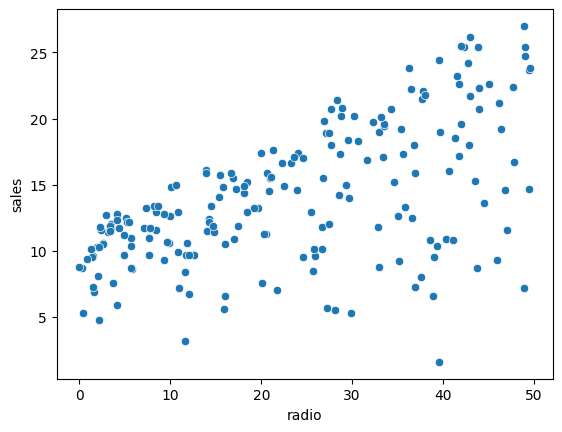

In [ ]:
sns.scatterplot(x='radio', y='sales', data=df)

<Axes: xlabel='newspaper', ylabel='sales'>

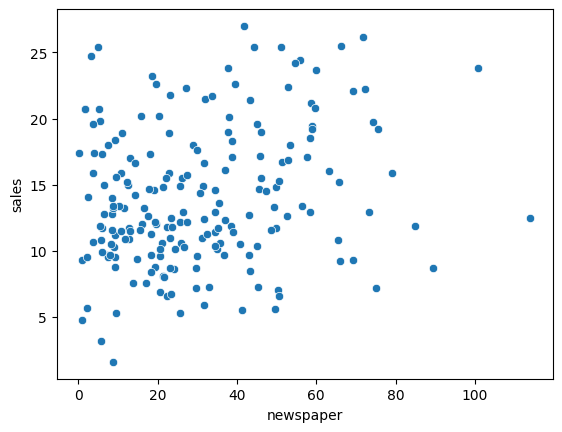

In [ ]:
sns.scatterplot(x='newspaper', y='sales', data=df)

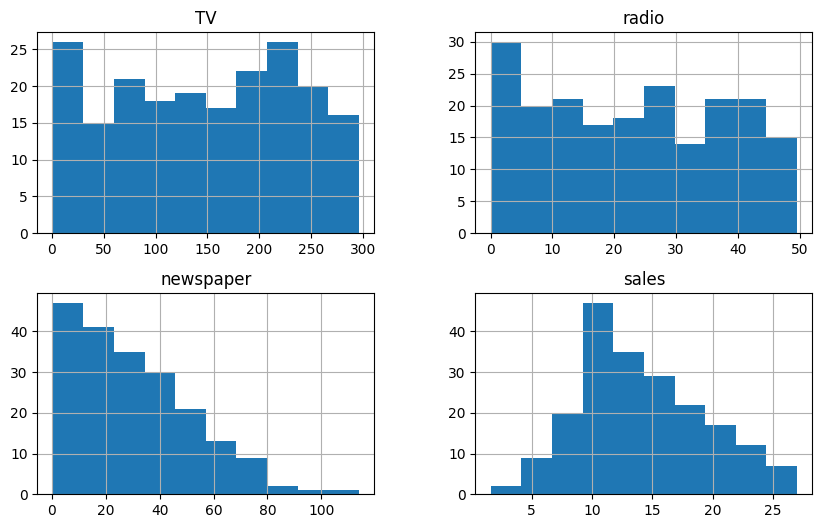

In [ ]:
df.hist(bins=10,figsize=(10,6))
plt.show()

In [ ]:
df.groupby('sales').mean ()

,TV,radio,newspaper
sales,,,
1.6,0.70,39.600000,8.7
3.2,4.10,11.600000,5.7
4.8,8.60,2.100000,1.0
5.3,9.25,15.150000,17.5
5.5,7.30,28.100000,41.4
...,...,...,...
24.7,220.30,49.000000,3.2
25.4,266.60,45.033333,33.5
25.5,283.60,42.000000,66.2


In [ ]:
df['sales'].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

# observing corelation between features

In [ ]:
# sales prediction (so we should check the relation between independent(TV,radio,newspaper) and dependent(sales))
# which is done by df.corr
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

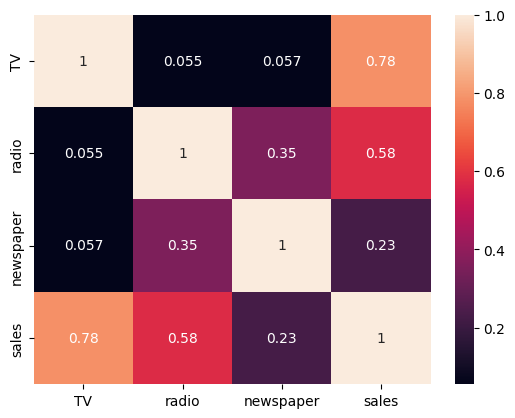

In [ ]:
sns.heatmap(df.corr(),annot=True)

* it showes that sales positively correlates with TV with correalation value 0.78
* sales positively correlates with radio with correalation value 0.58
* sales positively correlates with newspaper with correalation value 0.23

# feature selection

In [ ]:
# splitting independent variable TV from sales
X = df [['TV']]
y=df.sales

In [ ]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data. So, before making predictions  it is neccessary  train the model on a known data set. Then, based on this information, the model will try to predict outcomes for new data sets. An overfit model can give inaccurate predictions and cannot perform well for all types of new data.

# train test split : is important to prevent the overfitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 0.2 means 20% test data


X is the independent variable and y is the target variable (output). In train_test_split, test_size indicates the size of the dataset for testing. The value of 0.2 means that the data is divided into 80% for training and 20% for testing. random_state to randomize the training and test data

In [ ]:
X_train.shape,y_train.shape

((160, 1), (160,))

In [ ]:
X_test.shape,y_test.shape

((40, 1), (40,))

# training data
 * model fitting


is important to ensure that the algorithm is accurate, reliable, and unbiased.


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_test,y_test)

0.6766954295627076

# Prediction
we can get the coefficient and intercept values from the model using attributes like coef_ and intercept_:

In [ ]:
m=model.coef_
c=model.intercept_
print(f"m={m}")
print(f"c={c}")

m=[0.04652973]
c=7.119638430592953


From these two values, we can calculate linear regression . For example, if we want to predict how many sales we will get if we have a budget for television advertising of $50 ?

In [ ]:
model.predict([[50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.44612512])

# evaluation

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2=r2_score(y_true=y_test,y_pred=y_pred)
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)

In [ ]:
r2

0.6766954295627076

In [ ]:
mse

10.204654118800956

In [ ]:
mae

2.444420003751042

# Mulitple Linear Regression

The sales column is the dependent variable (symbolized as y) that we will use to create the model.The dependent variable is separate from the feature variable (symbolized as X which are Tv,radio and newspaper).

In [ ]:
X=df.drop(columns='sales',axis=1)# to drop a column axis should be return as 1 , if we have to drop row then axis should be 0
y=df['sales']

In [ ]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,y_train.shape

((160, 3), (160,))

In [ ]:
X_test.shape,y_test.shape

((40, 3), (40,))

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_test,y_test)

0.899438024100912

We got our result as 0.89 which is near to 1.If the score is 1, it means that the model we made is very perfect. If the value is 0, our model is very bad. In conclusion, our score that is close to 1 means the performance of the model that has been trained is getting better.So, it seems as using multiple selection method has given more better performence.

Therefore , this value is better than the previous score.

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2=r2_score(y_true=y_test,y_pred=y_pred)
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)

In [ ]:
r2

0.899438024100912

In [ ]:
mse

3.1740973539761033

In [ ]:
mae

1.4607567168117603